In [1]:

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
#di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.dpi'] = 200
import numpy as np
import odebook as ob
eps = 1e-2

# Домашнее задание 2.
# Выполнил студент 171-ой группы Лупашин Евгений.

## Задание 1.

Поле направлений формы — сопоставление каждой точке $(x_0, y_0)$ ядра линейной функции $F_1(x_0, y_0)dx + F_2(x_0, y_0)dy$. Приступаем к решению с этими знаниями!

**a)** Строим поле направлений для формы:
$$ \omega = 2dx + 5dy $$

(тут и далее будем рисовать "красивое", отнормированное поле)

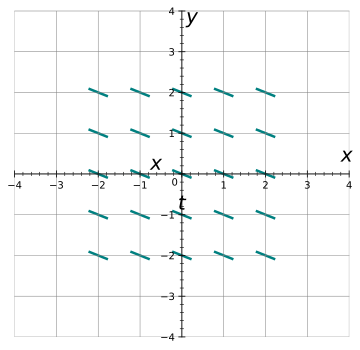

In [3]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$x$", fontsize=20, rotation=0)
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)

#ob.normdirfield(t, x, (lambda t, x: -2 * t / 5 / x), length=deltax*0.9)
fs = lambda x, y: np.array([-5, 2]) / np.linalg.norm(np.array([-5, 2])) 
ob.mquiver(x, y, fs, color='Teal', pivot='mid', headlength=0, headwidth=0, 
           scale=2, minlength=0, headaxislength=0, scale_units='x')
plt.show()

**b)** Строим поле направлений для формы:
$$ \omega = 2x dx + 5y dy $$

Красным тут и далее будем отмечать точки, в которых направление не задано

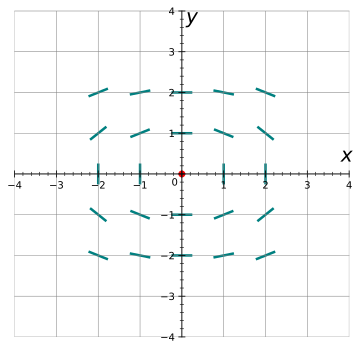

In [24]:
def norm(a):
    return np.linalg.norm(np.array(a))

plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
#plt.xlabel("$t$", fontsize=20)
#plt.ylabel("$x$", fontsize=20, rotation=0)
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)

#ob.normdirfield(t, x, (lambda t, x: -2 * t / 5 / x), length=deltax*0.9)
fs = lambda x, y: np.array([-5 * y, 2 * x]) / norm([-5 * y, 2 * x])
ob.mquiver(x, y, fs, color='Teal', pivot='mid', headlength=0, headwidth=0, 
           scale=2, minlength=0, headaxislength=0, scale_units='x')
for X in x:
    for Y in y:
        if np.isnan(norm(fs(X, Y))):
            #print(X, Y)
            plt.scatter(x=[X], y=[Y], color='Red')
plt.show()

**c)** Строим поле направлений для формы:
$$ \omega = 3y dx - 5x dy $$

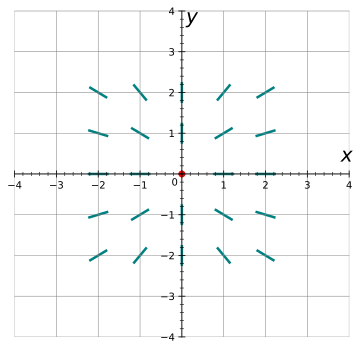

In [5]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)

fs = lambda x, y: np.array([5 * x, 3 * y]) / norm([5 * x, 3 * y])
ob.mquiver(x, y, fs, color='Teal', pivot='mid', headlength=0, headwidth=0, 
           scale=2, minlength=0, headaxislength=0, scale_units='x')
for X in x:
    for Y in y:
        if np.isnan(norm(fs(X, Y))):
            plt.scatter(x=[X], y=[Y], color='Red')
plt.show()

**d)** Строим поле направлений для формы:
$$ \omega = 2y dx + 4x dy $$

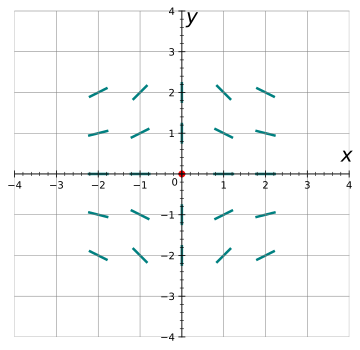

In [6]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)

fs = lambda x, y: np.array([-4 * x, 2 * y]) / norm([-4 * x, 2 * y])
ob.mquiver(x, y, fs, color='Teal', pivot='mid', headlength=0, headwidth=0, 
           scale=2, minlength=0, headaxislength=0, scale_units='x')
for X in x:
    for Y in y:
        if np.isnan(norm(fs(X, Y))):
            plt.scatter(x=[X], y=[Y], color='Red')
plt.show()

## Задание 2.

Сразу заметим, что задание подозрительно похоже на первое, надо лишь разделить на одну из переменных. Это и является ответом на вопрос, как эти уравнения связаны с формами из первого номера (то есть это почти такие же уравнение, но часть решений "потерялась"). Можно сказать и про связь графиков — в данном случае будет лишь чуть больше "выколотых" точек из-за того, что мы делим на переменную.

**a)** Строим поле направлений для уравнения:
$$ \dot y = -\frac{2}{5} $$

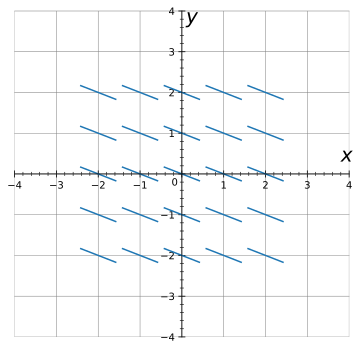

In [7]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)
ob.normdirfield(x, y, (lambda x, y: -2 / 5), length=deltax*0.9)

**b)** Строим поле направлений для уравнения:
$$ \dot y = -\frac{2x}{5y} $$

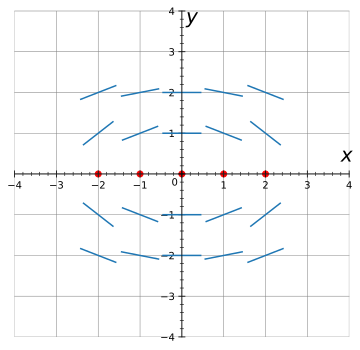

In [8]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)
fs = lambda x, y: -2 * x / 5 / y
ob.normdirfield(x, y, fs, length=deltax*0.9)
for X in x:
    for Y in y:
        if np.isnan(norm(fs(X, Y))) or np.isinf(norm(fs(X, Y))):
            plt.scatter(x=[X], y=[Y], color='Red')

**c)** Строим поле направлений для уравнения:
$$ \dot y = \frac{3y}{5x} $$

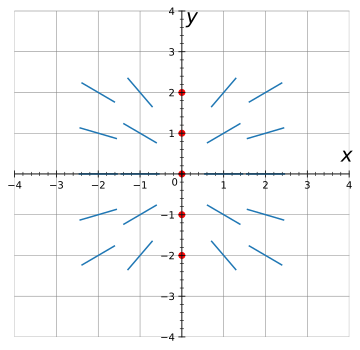

In [9]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)
fs = lambda x, y: 3 * y / 5 / x
ob.normdirfield(x, y, fs, length=deltax*0.9)
for X in x:
    for Y in y:
        if np.isnan(norm(fs(X, Y))) or np.isinf(norm(fs(X, Y))):
            plt.scatter(x=[X], y=[Y], color='Red')

**d)** Строим поле направлений для уравнения:
$$ \dot y = -\frac{y}{2x} $$

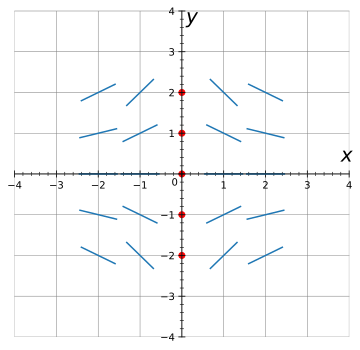

In [10]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 2
x = np.linspace(-border, border, 2 * border + 1)
y = np.linspace(-border, border, 2 * border + 1)
fs = lambda x, y: -y / 2 / x
ob.normdirfield(x, y, fs, length=deltax*0.9)
for X in x:
    for Y in y:
        if np.isnan(norm(fs(X, Y))) or np.isinf(norm(fs(X, Y))):
            plt.scatter(x=[X], y=[Y], color='Red')

## Задание 3.

В этом номере нам нужно рассмотреть частный случай модели Лотки-Вальтерра:
$$ \begin{cases}
\dot x = 2x - xy \\
\dot y = -y + xy \\
\end{cases} $$

**a)** Ищём "особые точки". Надо лишь найти точки, в которых $\dot x = $ и $\dot y = 0$. Решаем, получаем точки $(0, 0)$ и $(1, 2)$

**b)** Рисуем векторное поле и  отмечаем изоклины:

**c)** Вопрос с подвохом. Во-первых, можно заметить, что если мы будем двигаться по векторам на графике, то есть лишь 4 точки, в которых палочки горизонтальны или вертикальны, и все эти точки лежат на уже отмеченных изоклинах. Но это нестрогое объяснение, а лишь интуитивное. Докажем, что "предчувствие" нас не обмануло. Пусть есть изоклина, заданная уравнением $y = kx, k \neq 0$ (не вертикальная и не горизонтальная). В таком случае, она пересекается в каких-то точках (возможно, отрицательных!) с уже имеющимися двумя. Однако, назревает вопрос, какое нам дело до отрицательных точек, ведь мы рассматриваем модель, где $x$ и $y$ положительны! А дело в том, что когда мы искали "особые точки", мы просто решали систему уравнений, не используя знания о том, положительны переменные или нет. Таким образом, мы нашли ВСЕ решения, ВСЕ "особые точки". А пересечения третьей изоклины с отмеченными двумя (если она вертикальная, то пересечение с вертикальной, если вертикальна — с горизонтальной) дало бы новую "особую точку"! Противоречие.
Возможно, требовалось найти изоклину, на которой "чёрточки" не обязательно горизонтальные или вертикальные — из формулировки задания это не ясно. Но, на случай, если это так, то ответ тривиален — можно просто провести прямую, соединяющие 2 особые точки: $(0, 0)$ и $(1, 2)$.

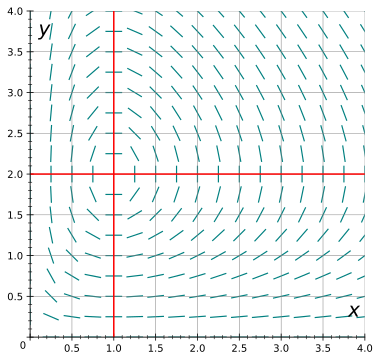

In [11]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))
deltax = 1
border = 4
plt.xlim(0, border)
plt.ylim(0, border)
x = np.linspace(0, border, 4 * border + 1)
y = np.linspace(0, border, 4 * border + 1)

fs = lambda x, y: np.array([2 * x - x * y, -y + x * y]) / norm([2 * x - x * y, -y + x * y]) / 2.5
ob.mquiver(x, y, fs, color='Teal', pivot='mid', headlength=0, headwidth=0, 
           scale=2, minlength=0, headaxislength=0, scale_units='x')
plt.plot(x, 2 / (x + 1) * (x + 1), color='Red')
plt.plot(1 / (y + 1) * (y + 1), y, color='Red')
plt.show()

**d)** Просто разделим одно уравнение на другое:
$$ \frac{dy}{dx} = \frac{-y + xy}{2x - xy} = -\frac{y}{x} \cdot \frac{x - 1}{y - 2}$$

**e)** В последнем варианте записи уравнения выше видим намёк на разнесение переменных. Воспользуемся этим:
$$
-\frac{y - 2}{y} dy = \frac{x - 1}{x} dx \\
-\left(1 - \frac{2}{y} \right) dy = \left(1 - \frac{1}{x} \right) dx \\
-y + 2\ln(y) = x - \ln(x) + C
$$
Итого, ответ:
$$ C = x + y - \ln(x) - 2\ln(y), \ C \in \mathbb{R}$$

**f)** Ну, довольно просто (ведь по факту выше уже написан ответ):

$$ C = x + y - \ln(x) - 2\ln(y) \\
C = H(x, y) = F(x) + G(y) = \left(x - \ln(x) \right) + \left(y - 2\ln(y) \right) $$

**g)** Заметим, что для фиксированного $C$ график $H(x, y) = C$ представляет из себя замкнутую периодичную кривую. Однако, когда мы будем уменьшать С, "радиус" кривой тоже будет уменьшаться, пока она не схлопнется в точку. Это и будет нашим минимумом. В какую же точку это схлопнется? Конечно, в Особую Точку, куда же ещё. Итак, минимум: $H(1, 2) = 3 - 2\ln(2)$

**h)**

f(x) = H(x, y0)


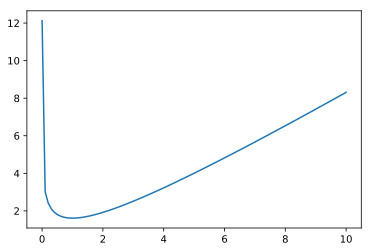

In [12]:
x = np.linspace(1e-5, 10, 100)
hx = x - np.log(x) + 2 - 2 * np.log(2)
plt.plot(x, hx)
print("f(x) = H(x, y0)")
plt.show()

g(y) = H(x0, y)


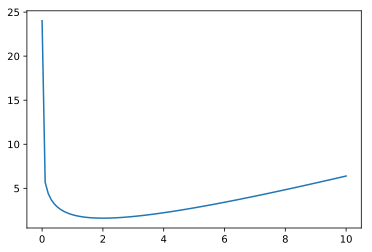

In [13]:
y = np.linspace(1e-5, 10, 100)
hy = y - 2 * np.log(x) + 1
plt.plot(y, hy)
print("g(y) = H(x0, y)")
plt.show()

**i)** Особые решения отмечены чёрным и зелёным. Черные — положения равновесия, зелёные — где одна переменная постоянна, а другая меняется (зеленыё чуть смещены относительно реального положения для лучшей видимости)

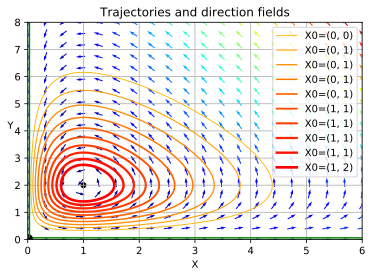

In [14]:
from scipy import integrate

a = 2
b = 1
c = 1
d = 1
t = np.linspace(0, 15,  1000)
X_f0 = np.array([0, 0])
X_f1 = np.array([c/d, a/b])

def dX_dt(X, t=0):
    return np.array([a*X[0] - b*X[0]*X[1], -c*X[1] + d*X[0]*X[1] ])

values  = np.linspace(0.25, 0.75, 10)
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1, len(values)))
f2 = plt.figure()

for v, col in zip(values, vcolors):
    X0 = v * X_f1
    X = integrate.odeint( dX_dt, X0, t)
    plt.plot(X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % (X0[0], X0[1]))

ymax = 8
xmax = 6
nb_points = 20
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)
DX1, DY1 = dX_dt([X1, Y1])
M = (np.hypot(DX1, DY1))
M[M == 0] = 1
DX1 /= M
DY1 /= M

plt.plot([0.1, 10], [0.06, 0.06], color='Green')
plt.plot([0.03, 0.03], [0.1, 10], color='Green')
plt.scatter(1, 2, color='Black', s=25)
plt.scatter(0, 0, color='Black', s=100)

plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()

**j)** Да, метод пристального взгляда на картинку говорит нам, что существует бесконечно много периодических решений

**k)** И непериодических существует бесконечно много. Помимо $y = 0$, для $x = 0$ и $y$ равного произвольной ненулевой константе решение будет эспонентой, стремящейся к нулю (на графике такие решения слились в одну прямую $x = 0$)

**l)** Есть. Решения для $y = 0$ и $x$ равный произвольной ненулевой константе будет экспонентой, убегающей в бесконечность

## Задание 4.

**_Disclaimer_**: некоторые из заданий в этом номере будут решены методом подгонианов, а именно интегрированием одной части диффиренциального уравнения вида $F_1(x,y) dx + F_2(x, y) dy$ и поиском такой функции, зависящей от другой переменной, чтобы итоговая функция имела частные производные $F_1(x, y)$ и $F_2(x, y)$ соответственно. Не бейте, пожалуйста, у меня таким методом получается решать лучше всего.

Найти уравнение фазовых кривых (для систем автономных уравнений) или уравнение интегральных кривых (для неавтономных уравнений):

**a)** $$ \frac{dy}{dx} = \frac{x^3 - 2x^2y - 10xy^2 - 15y^3}{-2x^3 - 10x^2y - 15xy^2} $$
Заметим, что данное уравнение является однородным. Сделаем замену $y = t(x)x$:
$$ t'x + t = \frac{x^3 - 2x^2(tx) - 10x(tx)^2 - 15(tx)^3}{-2x^3 - 10x^2(tx) - 15x(tx)^2}
= \frac{x^3 - 2x^3 t - 10x^3 t^2 - 15x^3 t^3}{-2x^3 - 10x^3 t - 15x^3 t^2} $$

$$ t'x = \frac{x^3}{-2x^3 - 10x^3 t - 15x^3 t^2} $$

$$ \frac{dt}{dx} = \frac{1}{x(-2 - 10t - 15t^2)} $$

$$ \frac{dt}{-2 - 10t - 15t^2} = \frac{dx}{x} $$

$$ -\frac{1}{\sqrt{5}} \arctan\left(\sqrt{5}(3t + 1)\right) = \ln(x) + C $$

Делаем обратную замену и радуемся жизни:

$$ C = \ln(x) + \frac{\arctan\left( \sqrt{5} \frac{3y + x}{x} \right)}{\sqrt{5}}, \ C \in \mathbb{R} $$

**b)** $$ dx\left(-5x^4y^2sin(x^5 + y^4)\right) + dy\left(2y(-2y^4sin(x^5 + y^4) + cos(x^5 + y^4))\right) = 0 $$

Ну, тут вообще легко подбирается такая F(x, y), чтобы её дифференциал равнялся выражению выше. Итого, интегральные кривые имеют вид:
$$ y^2 cos(x^5 + y^4) = C, \ C \in \mathbb{R} $$

**c)** $$ y' = \frac{3x^2 \sin(x^3) \sin(y^4)}{4y^3 \cos(x^3) \cos(y^4)} $$
Тут тоже всё элементарно, можно сначала привести к такому виду, как в пункте выше, а дальше просто проинтегрировать часть с $dx$. Ответ:
$$ \cos(x^3) \sin(y^4) = C, \ C \in \mathbb{R} $$

**d)** $$ \frac{dy}{dx} = \frac{x^3 - x^2y - 8xy^2 - 15y^3}{-x^3 - 8x^2y - 15xy^2} $$

Снова однородное уравнение, снова делаем замену $y = t(x)x$:

$$ t'x + t = \frac{x^3 - x^3t - 8x^3t^2 - 15x^3t^3}{-x^3 - 8x^3t - 15x^3t^2} $$

$$ t'x = \frac{x^3}{-x^3 - 8x^3t - 15x^3t^2} $$

$$ \frac{dt}{dx} = \frac{1}{x(-1 - 8t - 15t^2)} $$

$$ \frac{dt}{-1 - 8t - 15t^2} = \frac{dx}{x} $$

$$ \frac{1}{2} \ln(\frac{3t + 1}{5t + 1}) = \ln(x) + C $$

$$ \sqrt{\frac{3y + x}{5y + x}} = Cx; \ x = 0, y = Ce^{15y^3}; x=0, y=0 \ , \ C \in \mathbb{R} $$

**e)** Ну это вообще жесть какая-то, разве можно такое давать бедным второкурсникам? Реквестирую разбор задания

## Задание 5.

**a)**

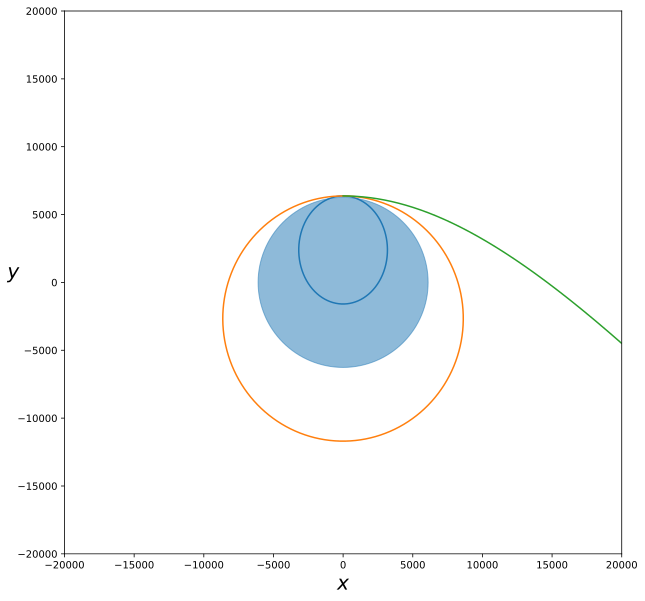

In [15]:
def draw_trajectory(R, M, v0, totaltime):
    C = 398600.4415888888
    deltat = 1
    t = 0
    x = 0
    y = R
    vx = v0
    vy = 0
    Tarr = [t]
    Xarr = [x]
    Yarr = [y]
    Varr = [(vx, vy)]
    while t < totaltime:
        a = C / (x ** 2 + y ** 2)
        alpha = np.arctan2(x, y)
        vx -= a * np.sin(alpha)
        vy -= a * np.cos(alpha)
        x += vx
        y += vy
        t += deltat
        Tarr.append(t)
        Xarr.append(x)
        Yarr.append(y)
        Varr.append((vx, vy))
    plt.plot(Xarr, Yarr)
    return [(Xarr[i], Yarr[i], i) for i in range(len(Xarr))]

plt.figure(figsize=(10,10))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.xlim(-2 * 10 ** 4, 2 * 10 ** 4)
plt.ylim(-2 * 10 ** 4, 2 * 10 ** 4)
plt.scatter(0, 0, s=6371.302*4.55, alpha=0.5)
for v in [5, 9, 12]:
    draw_trajectory(6371.302, 5.972 * 10 ** 24, v, 10 ** 4)
plt.show()

**b)**

Вычисленная первая космическая скорость равна:	 7.9207602 км/c
Реальная первая космическая скорость равна:	 7.9195959 км/c


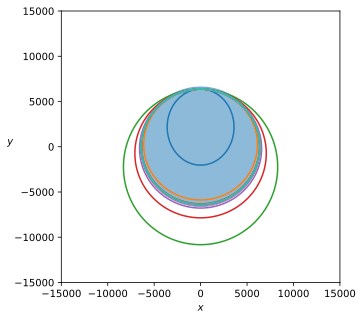

In [16]:
plt.figure(figsize=(5,5))
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10, rotation=0)
plt.xlim(-1.5 * 10 ** 4, 1.5 * 10 ** 4)
plt.ylim(-1.5 * 10 ** 4, 1.5 * 10 ** 4)
plt.scatter(0, 0, s=6371.302*2.25, alpha=0.5)

l = 1
r = 10
while abs(r - l) > 1e-5:
    m = (r + l) / 2
    #print(m)
    arr = draw_trajectory(6371.302, 5.972 * 10 ** 24, m, 10 ** 4)
    if norm(arr[10 ** 4 // 2][:2]) < 6371.802:
        l = m
    else:
        r = m
print("Вычисленная первая космическая скорость равна:\t", round(r, 7), "км/c")
print("Реальная первая космическая скорость равна:\t", 7.9195959, "км/c")

**c)** Дабы не перегружать одну картинку, сделаем 5 разных картинок, на каждой по 2 последовательных скорости в порядке возрастания

*Внимание!* В коде есть костыль на случай "сингулярности". Если мы слишком приближаемся к центру планеты, то он зануляет скорости, дабы избежать некрасивых улётов в бесконечность из-за набора слишком большого ускорения

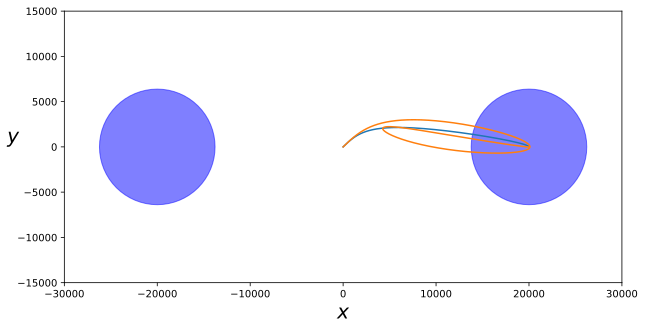

In [17]:
def two_planets(v0, totaltime, R=20000, M=5.972 * 10 ** 24):
    eps = 100
    C = 398600.4415888888
    deltat = 1
    t = 0
    x = 0
    y = 0
    vx = v0 / np.sqrt(2)
    vy = vx
    Tarr = [t]
    Xarr = [x]
    Yarr = [y]
    Varr = [(vx, vy)]
    while t < totaltime:
        F1 = C / ((x - R) ** 2 + y ** 2)
        F2 = C / ((x + R) ** 2 + y ** 2)
        alpha1 = np.arctan2(x - R, y)
        alpha2 = np.arctan2(x + R, y)
        vx -= F1 * np.sin(alpha1) + F2 * np.sin(alpha2)
        vy -= F1 * np.cos(alpha1) + F2 * np.cos(alpha2)
        if norm((x - R, y)) < eps or norm((x + R, y)) < eps: # костыль
            vx = 0
            vy = 0
        x += vx
        y += vy
        t += deltat
        Tarr.append(t)
        Xarr.append(x)
        Yarr.append(y)
        Varr.append((vx, vy))
    plt.plot(Xarr, Yarr)
    return [(Xarr[i], Yarr[i], i) for i in range(len(Xarr))]

plt.figure(figsize=(10,5))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.xlim(-3 * 10 ** 4, 3 * 10 ** 4)
plt.ylim(-3 * 10 ** 4 / 2, 3 * 10 ** 4 / 2)
plt.scatter(-20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
plt.scatter( 20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
arr = np.linspace(1, 5, 10)
for v in arr[0:2]:
    two_planets(v, 2 * 10 ** 4)
plt.show()

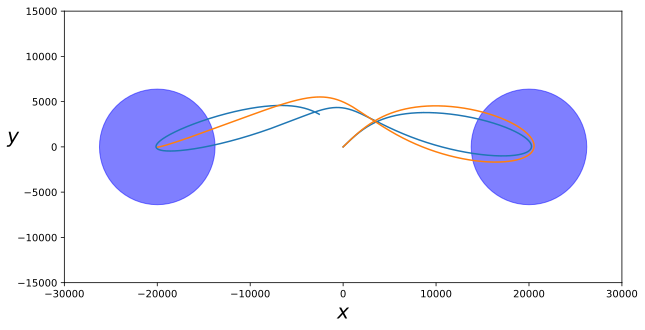

In [18]:
plt.figure(figsize=(10,5))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.xlim(-3 * 10 ** 4, 3 * 10 ** 4)
plt.ylim(-3 * 10 ** 4 / 2, 3 * 10 ** 4 / 2)
plt.scatter(-20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
plt.scatter( 20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
for v in arr[2:4]:
    two_planets(v, 2 * 10 ** 4)
plt.show()

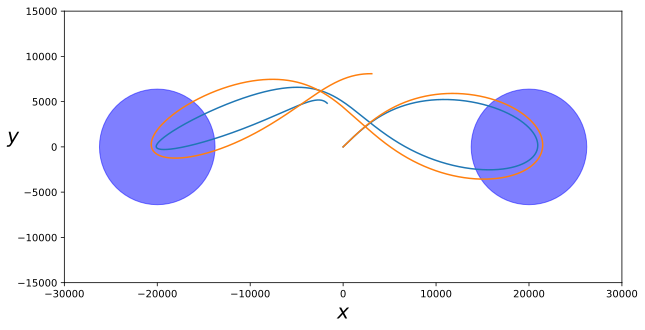

In [19]:
plt.figure(figsize=(10,5))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.xlim(-3 * 10 ** 4, 3 * 10 ** 4)
plt.ylim(-3 * 10 ** 4 / 2, 3 * 10 ** 4 / 2)
plt.scatter(-20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
plt.scatter( 20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
for v in arr[4:6]:
    two_planets(v, 2 * 10 ** 4)
plt.show()

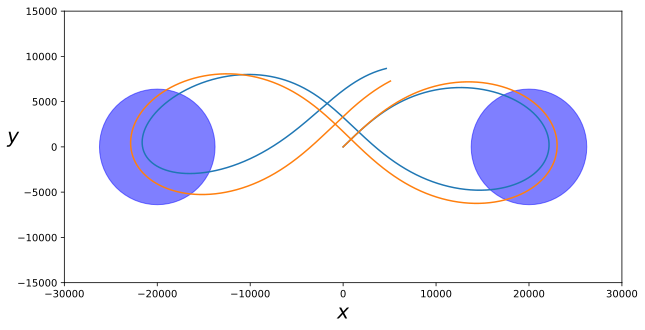

In [20]:
plt.figure(figsize=(10,5))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.xlim(-3 * 10 ** 4, 3 * 10 ** 4)
plt.ylim(-3 * 10 ** 4 / 2, 3 * 10 ** 4 / 2)
plt.scatter(-20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
plt.scatter( 20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
for v in arr[6:8]:
    two_planets(v, 2 * 10 ** 4)
plt.show()

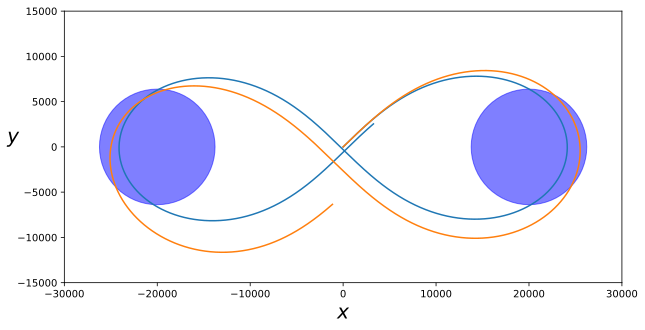

In [21]:
plt.figure(figsize=(10,5))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
plt.xlim(-3 * 10 ** 4, 3 * 10 ** 4)
plt.ylim(-3 * 10 ** 4 / 2, 3 * 10 ** 4 / 2)
plt.scatter(-20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
plt.scatter( 20000, 0, s=6371.302*2.1, alpha=0.5, color='Blue')
for v in arr[8:10]:
    two_planets(v, 2 * 10 ** 4)
plt.show()

## Задание 6.

$$ \dot{\dot x} = x^2 - x - 12 $$
Или, что то же самое:
$$ \begin{cases}
\dot x = x \\
\dot y = F(x), \ F(x) = x^2 - x - 12 \\
\end{cases} $$

**a)** Потенциальная энергия (график нарисуем ниже): $$ U(x) = \int F(x)dx = -\frac{x^3}{3} + \frac{x^2}{2} + 12x $$


**b)** Полная энергия: $$ H(x, y) = \frac{y^2}{2} + \left( -\frac{x^3}{3} + \frac{x^2}{2} + 12x \right) $$

**c)** Будет под графиком. Особые точки отмечены зелёным.

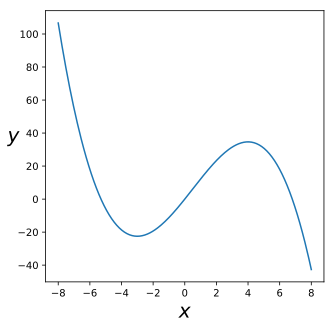

In [22]:
plt.figure(figsize=(5,5))
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20, rotation=0)
x = np.linspace(-8, 8, 200)
Ux = -x**3/3 + x**2/2 + 12*x
plt.plot(x, Ux)
plt.show()

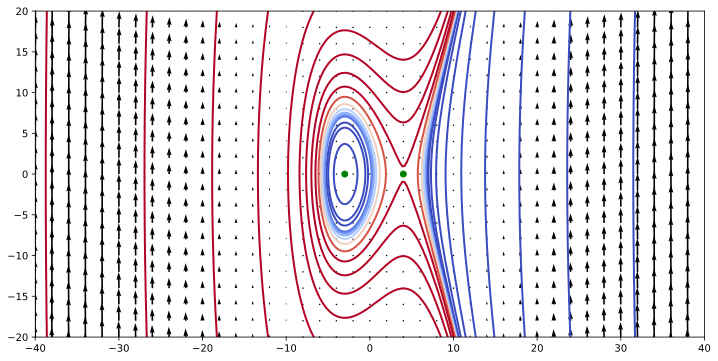

In [23]:
plt.figure(figsize=(12,6))
border = 40
plt.xlim(-border, border)
plt.ylim(-border/2, border/2)

a0 = [0.01,-0.5,0.5,0,-3,3,6,-6,12]
a1 = [34.62]
a2 = [-22.25]
a = [1.56**i for i in range(2, 12)] + [3**i for i in range(5, 10)] + [-2.5**i for i in range(1, 12)]
F = lambda x, y: y**2 / 2 + (-x**3/3 + x**2/2 + 12*x)
ob.mcontour(np.linspace(-border,border,300),np.linspace(-border,border,300),F, 
         levels=a,linewidths=2,
         vmin=0,vmax=25,cmap=plt.cm.coolwarm)
ob.vectorfield(np.arange(-border,border,2),np.arange(-border,border,2), lambda x, y: (y, x*x - x - 12))
plt.scatter(-3, 0, color='Green')
plt.scatter(4, 0, color='Green')
plt.show()

**d)** Все замкнутые кривые вокруг левой особой точки — периодические решения. Им соответствуют `levels` (линии уровня) от $-22.25$ до приблизительно $34.62$ (установлено экспериментальным путём) + особые точки.

**e)** Графический анализ показал, что ограниченными являются в точности те же решения, что и переодическими, потому что остальные довольно резво убегают в бесконечность

**f)** Графический анализ... Да ничего он не показал, тут нужно более серьёзно анализировать, сложно